[Reference](https://medium.datadriveninvestor.com/powerful-one-liners-in-pandas-every-data-scientist-should-know-620a84c14408)

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

city_list = ["New York", "Manchester", "California", "Munich", "Bombay",
             "Sydeny", "London", "Moscow", "Dubai", "Tokyo"]

job_list = ["Software Development Engineer", "Research Engineer",
            "Test Engineer", "Software Development Engineer-II",
            "Python Developer", "Back End Developer",
            "Front End Developer", "Data Scientist",
            "IOS Developer", "Android Developer"]

cmp_list = ["Amazon", "Google", "Infosys", "Mastercard", "Microsoft",
            "Uber", "IBM", "Apple", "Wipro", "Cognizant"]

data = []
for i in range(1000):

    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Full Time", "Intern"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)

    data.append([company, job, city, salary, employment, rating])

data = pd.DataFrame(data, columns=["Company Name", "Employee Job Title",
                                   "Employee Work Location",  "Employee Salary",
                                   "Employment Status", "Employee Rating"])

In [8]:
n = 6
data.nlargest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
626,Mastercard,Software Development Engineer-II,Munich,997000,Full Time,1.5
586,Infosys,Software Development Engineer-II,Moscow,995000,Intern,4.5
784,Amazon,Android Developer,Munich,995000,Intern,3.1
271,Google,IOS Developer,Moscow,993000,Full Time,1.9
732,Wipro,Software Development Engineer,Tokyo,993000,Full Time,0.2
202,Mastercard,Data Scientist,London,992000,Full Time,3.5


In [9]:
n=6
data.sort_values("Employee Salary", ascending=False).head(n)

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
626,Mastercard,Software Development Engineer-II,Munich,997000,Full Time,1.5
586,Infosys,Software Development Engineer-II,Moscow,995000,Intern,4.5
784,Amazon,Android Developer,Munich,995000,Intern,3.1
732,Wipro,Software Development Engineer,Tokyo,993000,Full Time,0.2
271,Google,IOS Developer,Moscow,993000,Full Time,1.9
202,Mastercard,Data Scientist,London,992000,Full Time,3.5


In [10]:
n = 7
data.nsmallest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
950,Uber,Software Development Engineer,Bombay,0,Intern,0.6
130,Cognizant,Data Scientist,Sydeny,1000,Full Time,2.4
439,Apple,Test Engineer,New York,1000,Intern,0.5
513,Amazon,Research Engineer,Moscow,4000,Full Time,2.5
693,Amazon,IOS Developer,New York,4000,Full Time,2.6
283,Uber,Software Development Engineer,Moscow,6000,Full Time,1.7
640,IBM,Software Development Engineer,Sydeny,7000,Full Time,3.4


In [11]:
pd.crosstab(data["Company Name"], data["Employee Work Location"])

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,10,12,6,10,8,15,12,11,13,9
Apple,12,9,5,6,10,11,10,4,7,14
Cognizant,8,6,11,9,7,10,10,9,13,6
Google,5,15,14,13,12,10,16,5,13,6
IBM,10,10,12,6,5,10,7,13,11,12
Infosys,11,6,11,8,12,12,18,15,7,12
Mastercard,15,7,11,13,9,9,9,16,10,10
Microsoft,8,3,8,13,13,9,9,11,7,9
Uber,8,5,9,10,8,10,15,13,8,6


<Axes: xlabel='Employee Work Location', ylabel='Company Name'>

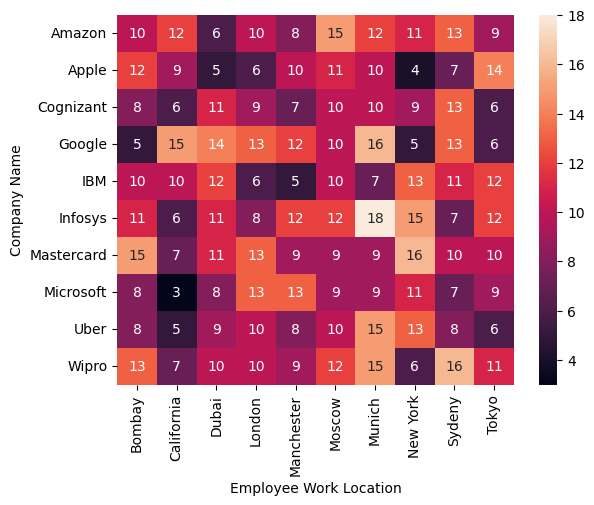

In [12]:
result_crosstab = pd.crosstab(data["Company Name"], data["Employee Work Location"])
sns.heatmap(result_crosstab, annot=True)

<Axes: xlabel='Employment Status', ylabel='Company Name'>

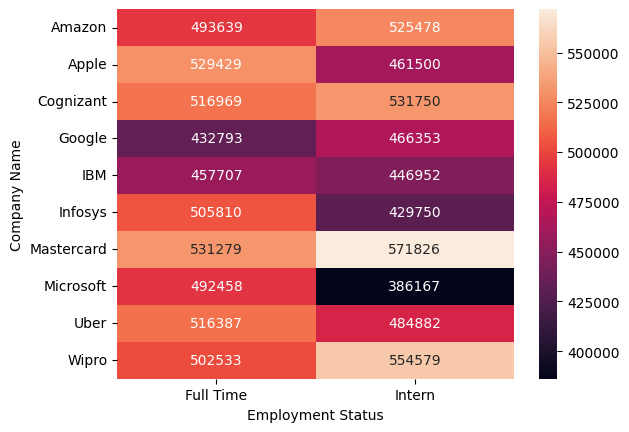

In [13]:
result_crosstab = pd.crosstab(index = data["Company Name"],
                              columns=data["Employment Status"],
                              values = data["Employee Salary"],
                              aggfunc=np.mean)

sns.heatmap(result_crosstab, annot = True, fmt = 'g')

In [14]:
pd.pivot_table(data,
               index=["Company Name"],
               columns=["Employee Work Location"],
               aggfunc='size',
               fill_value=0)

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,10,12,6,10,8,15,12,11,13,9
Apple,12,9,5,6,10,11,10,4,7,14
Cognizant,8,6,11,9,7,10,10,9,13,6
Google,5,15,14,13,12,10,16,5,13,6
IBM,10,10,12,6,5,10,7,13,11,12
Infosys,11,6,11,8,12,12,18,15,7,12
Mastercard,15,7,11,13,9,9,9,16,10,10
Microsoft,8,3,8,13,13,9,9,11,7,9
Uber,8,5,9,10,8,10,15,13,8,6


<Axes: xlabel='Employee Work Location', ylabel='Company Name'>

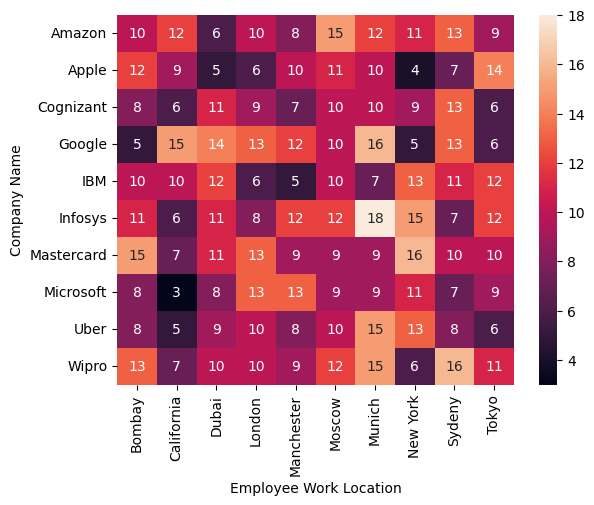

In [15]:
result_pivot = pd.pivot_table(data,
                              index=["Company Name"],
                              columns=["Employee Work Location"],
                              aggfunc='size',
                              fill_value=0)

sns.heatmap(result_pivot, annot = True, fmt = 'g')